**Set up work**

Imports, read data file, etc.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.ensemble
import sklearn.tree

# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_house_data = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/kc_house_data.csv", index_col="id")

print(f"Read {len(df_house_data)} recods.")
print(df_house_data.columns)




Read 21613 recods.
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')


Helper functions...

In [4]:
def plot_model(model, features, target):
    '''Helper function to plot actual vs predicted outcomes.'''
    
    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]

    # run the model, get score and max
    model_predictions = model.predict(features)
    model_score = model.score(features, target)
    max_value = model_predictions.max()

    # plot the prediction line and predictions vs actuals
    plt.plot([0, max_value], [0, max_value], label="actual=predicted", color="red")
    plt.scatter(model_predictions, target, color="blue", alpha=0.3)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Actual vs Predicted  (R^2 = {model_score:.2f})")
    plt.show()

def show_model_details(model, features, target):
    '''Helper function to show the model's details:'''

    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]

    model_score = model.score(features, target)
    print(f"{model_name}")
    print(f"R^2 = {model_score:.2f}")
    
    if 'coef_' in dir(model):
        # show the coefficients and intercept of this regression
        df_coef = pd.DataFrame(model.coef_, features.columns, columns=['Coefficients'])
        df_coef['Mean'] = features.mean()
        df_coef['Contribution'] = df_coef['Coefficients'] * df_coef['Mean']
        df_coef.loc['intercept', 'Coefficients'] = model.intercept_ 
        print(df_coef)

**Regression**
- Linear regression model
- Plot predicted vs actual
- Try some different regession models

Using features: Index(['sqft_living', 'bedrooms', 'bathrooms'], dtype='object')
sklearn.linear_model._base.LinearRegression
R^2 = 0.49
              Coefficients         Mean   Contribution
sqft_living     277.278748  2069.033101  573698.907860
bedrooms     -52530.083291     3.361281 -176568.388601
bathrooms     11414.720879     2.107765   24059.544862
intercept    110931.164244          NaN            NaN


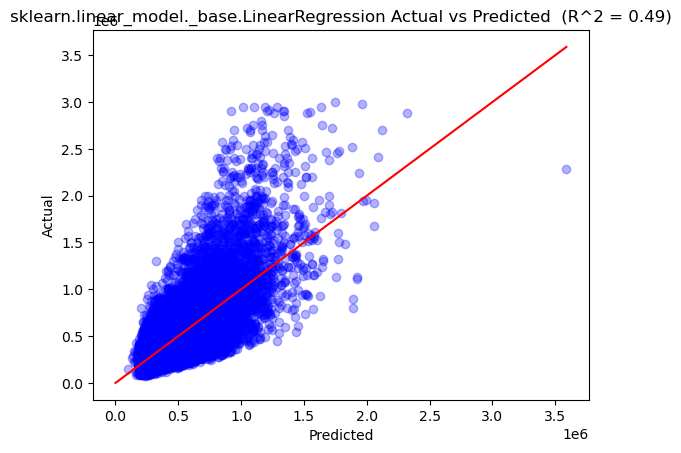

In [5]:
# remove some outliers:
df_house_data_cleaned = df_house_data.query('bedrooms <= 7').query('price < 3000000')

target = df_house_data_cleaned['price']
# # try with just a few columns, add and re-run the model
# features = df_house_data[[ 'bedrooms']]
features = df_house_data_cleaned[['sqft_living', 'bedrooms', 'bathrooms', ]]
# features = df_house_data.drop(columns=['date', 'yr_built', 'yr_renovated', 
#                                         'zipcode','lat', 'long', 'price',], axis=1)
print(f'Using features: {features.columns}')

# # linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(features, target)

# gradient boosting regression model
# model = sklearn.ensemble.GradientBoostingRegressor()
# model.fit(features, target)

# model = sklearn.ensemble.HistGradientBoostingRegressor()
# model.fit(features, target)

# model = sklearn.tree.DecisionTreeRegressor()
# model.fit(features, target)

show_model_details(model, features, target)
plot_model(model, features, target)




Model Validation
- split the data set into subsets for training and testing


In [ ]:
# example with np.array


Example with housing DataFrame

In [6]:
# remove some outliers:
df_house_data_cleaned = df_house_data.query('bedrooms <= 7').query('price < 3000000')

target = df_house_data_cleaned['price']
# # try with just a few columns, add and re-run the model
features = df_house_data[[ 'bedrooms']]
# features = df_house_data_cleaned[['sqft_living', 'bedrooms', 'bathrooms', ]]
# features = df_house_data_cleaned.drop(columns=['date', 'yr_built', 'yr_renovated', 
#                                         'zipcode','lat', 'long', 'price',], axis=1)



**Cross Validation of models:** 
cross_validate performs cross-validation by splitting the data into multiple folds, 
training the model on a subset of the folds, and evaluating it on the remaining fold.
 This process is repeated for each fold, and the results are aggregated to provide a 
 comprehensive evaluation.

In [7]:
from sklearn.model_selection import cross_validate
